<div style="text-align: center; background-color: #450C1C; padding: 10px; border-radius: 10px;">
    <span style="color: white; font-size: 50px; font-weight: bold;">ECG Heartbeat Classification</span>
</div>

This project aims to classify heartbeats into **five distinct categories** using a **1D Convolutional Neural Network (1D CNN)**. The model is trained on data derived from the **MIT-BIH Arrhythmia Dataset**, a widely used and clinically relevant resource for ECG (electrocardiogram) signal analysis.

Each sample represents a single heartbeat, preprocessed into a fixed-length vector of 187 values, sampled at 125Hz. The classification task involves detecting and differentiating between five heartbeat types

<div style="text-align: center; background-color: #A8092D; padding: 5px; border-radius: 10px;">
    <span style="color: white; font-size: 35px; font-weight: bold;">Dataset Overview</span>
</div>

This dataset is designed for the classification of heartbeats from ECG (Electrocardiogram) signals. It combines samples from two important sources:

1. **MIT-BIH Arrhythmia Dataset** – Focused on classifying various arrhythmias.
2. **PTB Diagnostic ECG Database** – Focused on distinguishing between normal and myocardial infarction cases.

Each sample represents a single heartbeat, preprocessed into a fixed-length signal of 187 values. These samples have been labeled into specific classes that represent different heartbeat types. The dataset is suitable for training deep learning models for medical signal classification.


The heartbeat signals are classified into the following categories:
<table style="background-color: white; border-collapse: collapse; width: 60%; font-size: 14px; text-align: center; margin: auto;">
  <thead>
    <tr style="background-color: #DE4A55; color: white;">
      <th style="padding: 6px; border: 1px solid #ddd;">Label</th>
      <th style="padding: 6px; border: 1px solid #ddd;">Code</th>
      <th style="padding: 6px; border: 1px solid #ddd;">Description</th>
    </tr>
  </thead>
  <tbody style="color: black;">
    <tr>
      <td style="padding: 6px; border: 1px solid #ddd;">0</td>
      <td style="padding: 6px; border: 1px solid #ddd;">N</td>
      <td style="padding: 6px; border: 1px solid #ddd;">Normal beat</td>
    </tr>
    <tr>
      <td style="padding: 6px; border: 1px solid #ddd;">1</td>
      <td style="padding: 6px; border: 1px solid #ddd;">S</td>
      <td style="padding: 6px; border: 1px solid #ddd;">Supraventricular ectopic beat</td>
    </tr>
    <tr>
      <td style="padding: 6px; border: 1px solid #ddd;">2</td>
      <td style="padding: 6px; border: 1px solid #ddd;">V</td>
      <td style="padding: 6px; border: 1px solid #ddd;">Ventricular ectopic beat</td>
    </tr>
    <tr>
      <td style="padding: 6px; border: 1px solid #ddd;">3</td>
      <td style="padding: 6px; border: 1px solid #ddd;">F</td>
      <td style="padding: 6px; border: 1px solid #ddd;">Fusion beat</td>
    </tr>
    <tr>
      <td style="padding: 6px; border: 1px solid #ddd;">4</td>
      <td style="padding: 6px; border: 1px solid #ddd;">Q</td>
      <td style="padding: 6px; border: 1px solid #ddd;">Unknown beat</td>
    </tr>
  </tbody>
</table>




<div style="text-align: center; background-color: #A8092D; padding: 5px; border-radius: 10px;">
    <span style="color: white; font-size: 35px; font-weight: bold;">Libraries & Loading Data</span>
</div>

In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

2025-06-13 18:46:11.192965: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749840371.384660      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749840371.437251      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df_train = pd.read_csv("/kaggle/input/heartbeat/mitbih_train.csv", header=None)
df_test = pd.read_csv("/kaggle/input/heartbeat/mitbih_test.csv", header=None)

<div style="text-align: center; background-color: #A8092D; padding: 5px; border-radius: 10px;">
    <span style="color: white; font-size: 35px; font-weight: bold;">Exploratory Data Anlysis</span>
</div>

In [3]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_train.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [5]:
df_train.duplicated().sum()

0

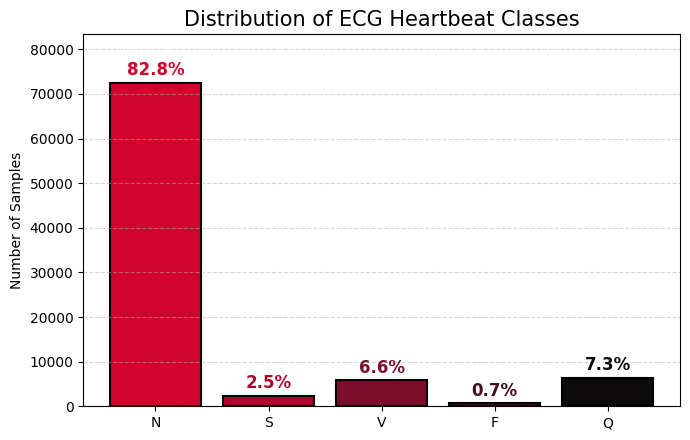

In [6]:
label_counts = df_train.iloc[:, 187].value_counts().sort_index()
labels = ['N', 'S', 'V', 'F', 'Q']
counts = [label_counts.get(i, 0) for i in range(5)]
total = sum(counts)
percentages = [count / total * 100 for count in counts]

colors = ['#D2042D', '#A8092D', '#7D0D2C', '#450C1C', '#0D0A0B']

plt.figure(figsize=(7, 4.5))
bars = plt.bar(labels, counts, color=colors, edgecolor='black', linewidth=1.5)

for bar, pct, color in zip(bars, percentages, colors):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + total * 0.01, 
             f'{pct:.1f}%', ha='center', va='bottom', color=color, 
             fontsize=12, fontweight='bold')

plt.title('Distribution of ECG Heartbeat Classes', fontsize=15)
plt.ylabel('Number of Samples')
plt.ylim(0, max(counts) * 1.15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

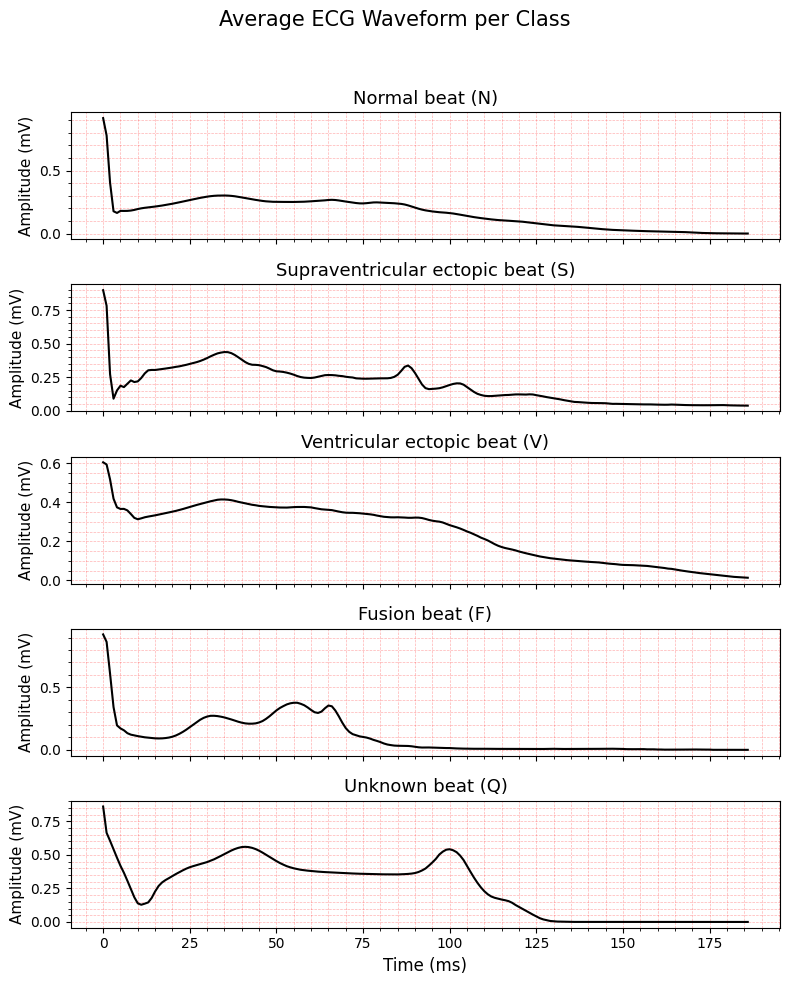

In [7]:
signal_cols = df_train.columns[:187]  
df_signals = df_train[signal_cols]
df_labels = df_train[187]

grouped_classes = df_signals.groupby(df_labels).mean()

conditions = {
    0: "Normal beat (N)",
    1: "Supraventricular ectopic beat (S)",
    2: "Ventricular ectopic beat (V)",
    3: "Fusion beat (F)",
    4: "Unknown beat (Q)"
}

fig, axes = plt.subplots(5, 1, figsize=(8, 10), sharex=True)

for i in range(5):
    signal = grouped_classes.loc[i].values
    ax = axes[i]
    ax.plot(signal, color='black', linewidth=1.5)
    ax.set_title(conditions[i], fontsize=13)
    ax.set_ylabel("Amplitude (mV)", fontsize=11)
    ax.grid(which='both', linestyle='--', linewidth=0.5, color='red', alpha=0.3)
    ax.minorticks_on()

axes[-1].set_xlabel("Time (ms)", fontsize=12)

fig.suptitle("Average ECG Waveform per Class", fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<div style="text-align: center; background-color: #A8092D; padding: 5px; border-radius: 10px;">
    <span style="color: white; font-size: 35px; font-weight: bold;">Data Preprocessing</span>
</div>

In [8]:
X = df_train.iloc[:, :-1].values         
y = df_train.iloc[:, -1].astype(int).values  
X_test = df_test.iloc[:, :-1].values
y_test = df_test.iloc[:, -1].astype(int).values

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [11]:
X_train = X_train.reshape(-1, X_train.shape[1], 1)
X_valid = X_valid.reshape(-1, X_valid.shape[1], 1)
X_test = X_test.reshape(-1, X_test.shape[1], 1)

In [12]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))
print(class_weights)

{0: 0.2416234023837039, 1: 7.878852643419573, 2: 3.0256155507559397, 3: 27.307212475633527, 4: 2.722759961127308}


<div style="text-align: center; background-color: #A8092D; padding: 5px; border-radius: 10px;">
    <span style="color: white; font-size: 35px; font-weight: bold;">Model Development</span>
</div>

In [13]:
model = Sequential([
    Conv1D(32, 5, padding='same', input_shape=(187,1)),
    BatchNormalization(), LeakyReLU(0.3),
    MaxPooling1D(2), Dropout(0.3),

    Conv1D(64, 5, padding='same'),
    BatchNormalization(), LeakyReLU(0.3),
    MaxPooling1D(2), Dropout(0.3),

    Conv1D(128, 5, padding='same'),
    BatchNormalization(), LeakyReLU(0.3),
    MaxPooling1D(2), Dropout(0.3),

    Conv1D(256, 5, padding='same'),
    BatchNormalization(), LeakyReLU(0.3),
    MaxPooling1D(2), Dropout(0.3),

    Conv1D(512, 5, padding='same'),
    BatchNormalization(), LeakyReLU(0.3),
    MaxPooling1D(2), Dropout(0.4),

    Conv1D(512, 5, padding='same'),
    BatchNormalization(), LeakyReLU(0.3),
    MaxPooling1D(2), Dropout(0.4),

    Flatten(),

    Dense(1024), BatchNormalization(), LeakyReLU(0.3), Dropout(0.5),
    Dense(512), BatchNormalization(), LeakyReLU(0.3), Dropout(0.5),
    Dense(256), BatchNormalization(), LeakyReLU(0.3), Dropout(0.5),
    Dense(128), BatchNormalization(), LeakyReLU(0.3), Dropout(0.5),
    Dense(64), BatchNormalization(), LeakyReLU(0.3), Dropout(0.5),
    Dense(32), BatchNormalization(), LeakyReLU(0.3), Dropout(0.5),
    Dense(5, activation='softmax')
])

early_stop = EarlyStopping(
    monitor='val_loss',     
    patience=20,             
    restore_best_weights=True, 
    verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',    
    factor=0.2,             
    patience=3,             
 )

model.compile(
    optimizer=Adam(1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1749840396.757182      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 187, 32)             │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 187, 32)             │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 187, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 93, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 93, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 93, 64)              │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 93, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 93, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 46, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 46, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 46, 128)             │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 46, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 46, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 23, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 23, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 23, 256)             │         164,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 23, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 23, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 11, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,945,989 (15.05 MB)

 Trainable params: 3,938,949 (15.03 MB)

 Non-trainable params: 7,040 (27.50 KB)

In [14]:
history = model.fit(
    X_train, y_train,
    batch_size=128,
    validation_data=(X_valid, y_valid),
    epochs=100,
    callbacks=[early_stop, reduce_lr],
    class_weight=class_weights,
    verbose=1
)

Epoch 1/100


I0000 00:00:1749840410.147617      62 service.cc:148] XLA service 0x7e173c002370 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749840410.148182      62 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1749840411.240254      62 cuda_dnn.cc:529] Loaded cuDNN version 90300


 16/548 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.2202 - loss: 2.0441

I0000 00:00:1749840421.647709      62 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


548/548 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.2510 - loss: 1.6073 - val_accuracy: 0.1502 - val_loss: 1.7610 - learning_rate: 0.0010
Epoch 2/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.4236 - loss: 0.8247 - val_accuracy: 0.4696 - val_loss: 1.1898 - learning_rate: 0.0010
Epoch 3/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.6479 - loss: 0.6238 - val_accuracy: 0.7267 - val_loss: 0.7901 - learning_rate: 0.0010
Epoch 4/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7504 - loss: 0.5405 - val_accuracy: 0.8029 - val_loss: 0.5714 - learning_rate: 0.0010
Epoch 5/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7832 - loss: 0.4760 - val_accuracy: 0.8057 - val_loss: 0.5991 - learning_rate: 0.0010
Epoch 6/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7870 - loss: 0.4603 - val_accuracy: 0.7929 - val_loss: 0.5979 - learning_rate: 0.0010
Epoch 7/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8085 - loss: 0.4264

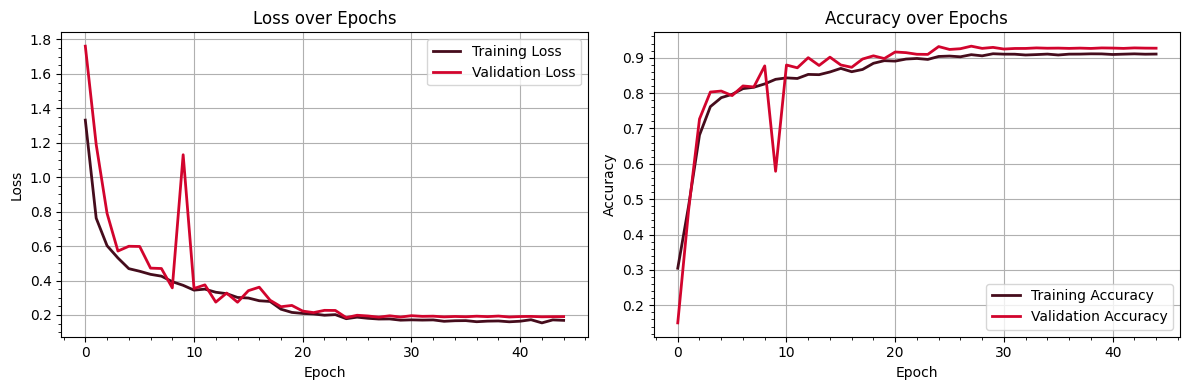

In [15]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='#450C1C', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='#D2042D', linewidth=2)
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.minorticks_on()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='#450C1C', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='#D2042D', linewidth=2)
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.minorticks_on()

plt.tight_layout()
plt.show()

685/685 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
Accuracy : 0.9309
Precision: 0.9644
Recall   : 0.9309
F1 Score : 0.9425
Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     18118
           1       0.36      0.90      0.52       556
           2       0.87      0.95      0.91      1448
           3       0.33      0.94      0.49       162
           4       0.97      0.99      0.98      1608

    accuracy                           0.93     21892
   macro avg       0.71      0.94      0.77     21892
weighted avg       0.96      0.93      0.94     21892



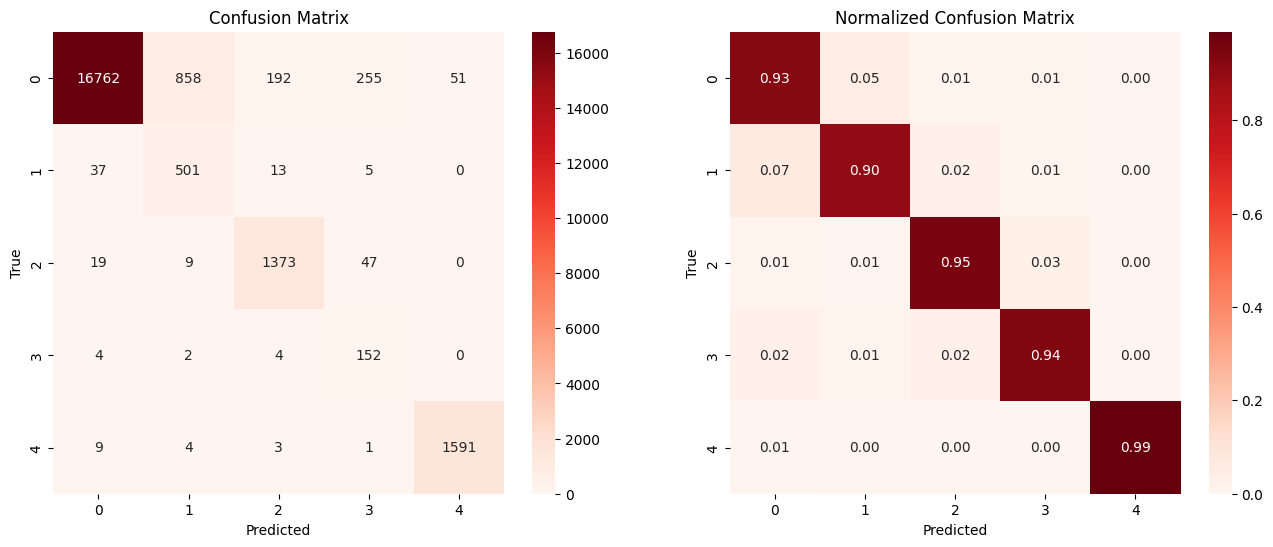

In [16]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

print("Classification Report:\n")
print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=[0,1,2,3,4], yticklabels=[0,1,2,3,4], ax=axs[0])
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("True")
axs[0].set_title("Confusion Matrix")

sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Reds", xticklabels=[0,1,2,3,4], yticklabels=[0,1,2,3,4], ax=axs[1])
axs[1].set_xlabel("Predicted")
axs[1].set_ylabel("True")
axs[1].set_title("Normalized Confusion Matrix")

plt.show()

In [17]:
model.save("model.h5")